In [38]:
# 加载需要的包
library(dplyr)
library(tidyr)
library(readr)
library(ggplot2)
library(RColorBrewer)
library(viridis)

In [39]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted")

In [40]:
cohort= read.csv('data/256sample_mutation_paired_clinical_filter_adjust.csv',sep=",",quote="\"",header=T)

In [41]:
head(cohort)

,ID,Sample,class,Chr,Start,End,Ref,Alt,Alt_all,Mutation.Class,⋯,age,tumor.diameter,membrane.invasion,surrounding.invasion,center.lymph,center.metastasis.lymph,center.metastasis,T.stage,N.stage,BRAF.V600E
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1337495,KY-131728,adjacent,chrM,310,310,T,C,"C,TC",Substitution (Transition),⋯,40,1.3,1,0,1,0,0,T1_T2,N0,1
2,1337495,KY-131728,adjacent,chrM,310,310,T,C,"C,TC",Substitution (Transition),⋯,40,1.3,1,0,1,0,0,T1_T2,N0,1
3,1338160,KY-131734,adjacent,chrM,16183,16183,A,ACCCCC,"C,ACCC,ACCCC,ACCCCC",Insertion,⋯,39,1.2,0,0,5,2,1,T1_T2,N1,1
4,1338160,KY-131734,adjacent,chrM,16183,16183,A,ACCCCC,"C,ACCC,ACCCC,ACCCCC",Insertion,⋯,39,1.2,0,0,5,2,1,T1_T2,N1,1
5,1338160,KY-131734,adjacent,chrM,16183,16183,A,ACCCCC,"C,ACCC,ACCCC,ACCCCC",Insertion,⋯,39,1.2,0,0,5,2,1,T1_T2,N1,1
6,1338160,KY-131734,adjacent,chrM,16183,16183,A,ACCCCC,"C,ACCC,ACCCC,ACCCCC",Insertion,⋯,39,1.2,0,0,5,2,1,T1_T2,N1,1


In [42]:
colnames(cohort)

[1] "ID"                      "Sample"                 
 [3] "class"                   "Chr"                    
 [5] "Start"                   "End"                    
 [7] "Ref"                     "Alt"                    
 [9] "Alt_all"                 "Mutation.Class"         
[11] "Func.MT_ensGene"         "Gene.MT_ensGene"        
[13] "ExonicFunc.MT_ensGene"   "AAChange.MT_ensGene"    
[15] "Otherinfo12"             "Otherinfo13"            
[17] "AF_all"                  "AF_value"               
[19] "gender"                  "age"                    
[21] "tumor.diameter"          "membrane.invasion"      
[23] "surrounding.invasion"    "center.lymph"           
[25] "center.metastasis.lymph" "center.metastasis"      
[27] "T.stage"                 "N.stage"                
[29] "BRAF.V600E"

In [43]:
cohort_selected <- cohort %>%
  select(Sample, class,Start, Ref, Alt, Mutation.Class, Gene.MT_ensGene) %>%
  distinct()

In [44]:
head(cohort_selected)

,Sample,class,Start,Ref,Alt,Mutation.Class,Gene.MT_ensGene
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,KY-131728,adjacent,310,T,C,Substitution (Transition),RNR1
2,KY-131728,adjacent,310,T,C,Substitution (Transition),tRNA-Phe
3,KY-131734,adjacent,16183,A,ACCCCC,Insertion,tRNA-Pro
4,KY-131734,adjacent,16183,A,ACCCCC,Insertion,CYTB
5,KY-131734,adjacent,16183,A,ACCCCC,Insertion,tRNA-Thr
6,WES-K84460,adjacent,14766,C,A,Substitution (Transversion),CYTB


In [45]:
gene_counts_tumor <- cohort_selected %>%
  filter(class == "tumor") %>%        # 选出 tumor
  group_by(Gene.MT_ensGene) %>%       # 按基因分组
  summarise(Counts = n(), .groups = "drop") %>%  # 计数
  arrange(desc(Counts))               # 排序（从大到小）


In [46]:
gene_counts_tumor

Gene.MT_ensGene,Counts
<chr>,<int>
CYTB,131
tRNA-Thr,116
tRNA-Pro,113
RNR1,108
tRNA-Phe,96
ND5,45
ND4,32
ND1,26
COX1,24


In [47]:
# 读取数据
data <- read.csv('data/TCMA_cancer_gene_counts.csv',sep=",",quote="",header=T)

In [48]:
sample_count=read.csv('data/TCMA_cancer_sample_counts.csv',sep=",",quote="",header=T)

In [49]:
tail(data)

,Cancer_Type,Gene,Count
,<chr>,<chr>,<int>
884,Clinical Thyroid Cancer Cohort,ND4,32
885,Clinical Thyroid Cancer Cohort,ND4L,4
886,Clinical Thyroid Cancer Cohort,ND5,45
887,Clinical Thyroid Cancer Cohort,ND6,6
888,Clinical Thyroid Cancer Cohort,RNR1,108
889,Clinical Thyroid Cancer Cohort,RNR2,14


In [50]:
# 数据处理
data_grouped <- data %>%
  group_by(Cancer_Type, Gene) %>%
  summarise(count = sum(Count)) %>%
  ungroup() %>%
  mutate(cancer_count = table(Cancer_Type)[Cancer_Type],
         gene_count = table(Gene)[Gene]) %>%
  arrange(desc(gene_count), desc(cancer_count))

`summarise()` has grouped output by 'Cancer_Type'. You can override using the
`.groups` argument.


In [51]:
print(tail(data_grouped))

# A tibble: 6 × 5
  Cancer_Type                     Gene  count cancer_count gene_count 
  <chr>                           <chr> <int> <table[1d]>  <table[1d]>
1 Breast Cancer                   TK        1 39           7          
2 Pancreatic Cancer               TK        2 38           7          
3 Pediatric Brain Cancer          TK        1 31           7          
4 Head and Neck Thyroid Carcinoma TK        1 29           7          
5 Kidney Chromophobe              TK        1 28           7          
6 Lung Adenocarcinoma             TK        2 25           7          


In [54]:
library(tidyr)
library(dplyr)
df=data_grouped
mat <- df |>
  group_by(Cancer_Type, Gene) |>
  summarise(count = sum(count), .groups = "drop") |>
  tidyr::pivot_wider(names_from = Gene,
                     values_from = count,
                     values_fill = 0) |>
  arrange(Cancer_Type)
# 写出
write.csv(mat, "data/TCMA_cancer_gene_totalCounts_matrix.csv", row.names = FALSE)

In [55]:
head(mat)

Cancer_Type,ATP6,COX2,COX3,CYTB,ND1,ND2,ND4,ND5,RNR1,⋯,TQ,TS2,OLR,TER,TK,TL2,TS1,TV,TY,TC
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Acute Myeloid Leukemia,1,1,1,2,1,3,3,3,3,⋯,0,0,0,0,0,0,0,0,0,0
Biliary Tract Cancer,2,2,1,1,6,0,5,6,1,⋯,0,0,0,0,0,0,0,0,0,0
Bladder Cancer,6,8,4,4,2,3,10,7,3,⋯,0,0,0,0,0,0,0,0,0,0
Bone Cancer,0,3,4,7,6,4,7,13,8,⋯,0,0,0,0,0,0,0,0,0,0
Brain Glioblastoma Multiforme,1,1,5,5,4,3,1,2,0,⋯,1,1,0,0,0,0,0,0,0,0
Brain Lower Grade Glioma,0,1,1,1,1,0,7,3,2,⋯,0,0,0,0,0,0,0,0,0,0


In [52]:
library(ggplot2)
library(colorspace)

In [97]:
sample_count <- sample_count %>%
  mutate(Cancer_Type_label = paste0(Cancer_Type, " (n=", sample_count, ")"))

# 把标签和原始数据对应起来
data_grouped1 <- merge(data_grouped,sample_count[,c(1,3)],by.x=1,by.y=1)

In [98]:
head(sample_count)

,Cancer_Type,sample_count,Cancer_Type_label
,<chr>,<int>,<chr>
1,Acute Myeloid Leukemia,5,Acute Myeloid Leukemia (n=5)
2,Biliary Tract Cancer,12,Biliary Tract Cancer (n=12)
3,Bladder Cancer,19,Bladder Cancer (n=19)
4,Bone Cancer,50,Bone Cancer (n=50)
5,Brain Glioblastoma Multiforme,28,Brain Glioblastoma Multiforme (n=28)
6,Brain Lower Grade Glioma,16,Brain Lower Grade Glioma (n=16)


In [12]:
head(data_grouped1)

ERROR: Error in head(data_grouped1): object 'data_grouped1' not found


In [11]:
data_grouped1_sorted <- data_grouped1 %>%
  arrange(desc(cancer_count))

ERROR: Error in arrange(., desc(cancer_count)): object 'data_grouped1' not found


In [101]:
head(data_grouped1_sorted)

,Cancer_Type,Gene,count,cancer_count,gene_count,Cancer_Type_label
,<chr>,<chr>,<int>,<table[1d]>,<table[1d]>,<chr>
1,Prostate Adenocarcinoma,CYTB,50,40,37,Prostate Adenocarcinoma (n=155)
2,Prostate Adenocarcinoma,ND4,57,40,37,Prostate Adenocarcinoma (n=155)
3,Prostate Adenocarcinoma,ND5,44,40,37,Prostate Adenocarcinoma (n=155)
4,Prostate Adenocarcinoma,RNR2,74,40,37,Prostate Adenocarcinoma (n=155)
5,Prostate Adenocarcinoma,TF,3,40,13,Prostate Adenocarcinoma (n=155)
6,Prostate Adenocarcinoma,TH,1,40,13,Prostate Adenocarcinoma (n=155)


In [102]:
colors <- qualitative_hcl(37, palette = "Dark 3")

data_grouped1_sorted$Cancer_Type_label <- factor(
  data_grouped1_sorted$Cancer_Type_label,
  levels = rev(unique(data_grouped1_sorted$Cancer_Type_label))  # 倒置顺序
)

data_grouped1_sorted$Gene <- factor(
  data_grouped1_sorted$Gene,
  levels = data_grouped1_sorted %>%
    group_by(Gene) %>%
    summarise(gene_count = max(gene_count)) %>%
    arrange(desc(gene_count)) %>%
    pull(Gene)
)

# 绘制气泡图（恢复坐标轴线条）
p <- ggplot(data_grouped1_sorted, aes(x = Gene, y = Cancer_Type_label, size = count, color = Cancer_Type_label)) +
  geom_point(alpha = 0.7) +
  scale_size_continuous(range = c(1, 15)) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    axis.text.y = element_text(size = 14),
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    axis.line = element_line(color = "black", size = 0.5)  # 加上坐标轴线
  ) +
  labs(x = "Gene", y = "Cancer Type") +
  scale_color_manual(values = colors)

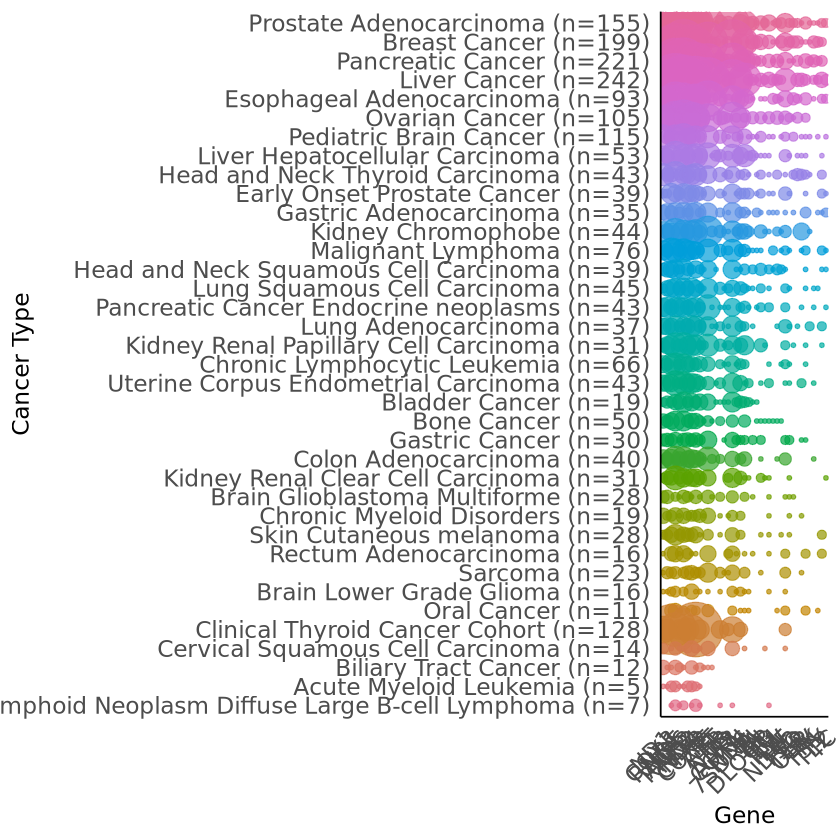

In [79]:
p

In [103]:
# 保存为 PDF 文件
ggsave("plots/buchong/TCMA_cancer_gene_mutation_counts.pdf", plot = p, width = 17, height = 9,dpi=300)